<a href="https://colab.research.google.com/github/lasa002/IAyRN_AgoDic_2024/blob/main/IAyRN_Act8_2077668.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligencia Artificial y Redes Neuronales

Actividad 8

Luis Alberto Sánchez Álvarez

2077668   IMTC    N1



El primer paso del codigo es cargar las liberias a utilizar y se cargan los archivos que usaremos para este problema, en nuestro caso utilizaremos el conjunto de datos MNIST


In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


Seguido de esto se separa este grupo para tener una cantidad para el entrenamiento y otra para el test



In [31]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Le damos nombre a cada una de las clases y a su vez realizamos algunos codigos para comprobar las dimensiones tanto de las imagenes de prueba, como de test, asi como las etiquetas

In [32]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
len(train_labels)

60000

In [35]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
test_images.shape

(10000, 28, 28)

In [37]:
len(test_labels)

10000

Se realiza un preprocesado de los datos y en este observamos algunos de los que tengamos

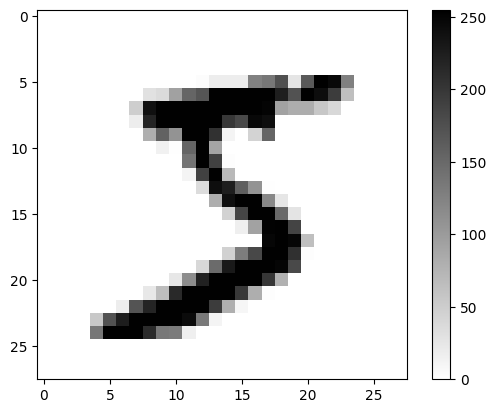

In [38]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Se realiza una normalización de los datos para que estos vayan de 0 a 1 en lugar de ir de 0 a 255

In [39]:
# Normalización de los datos
train_images = train_images / 255.0
test_images = test_images / 255.0


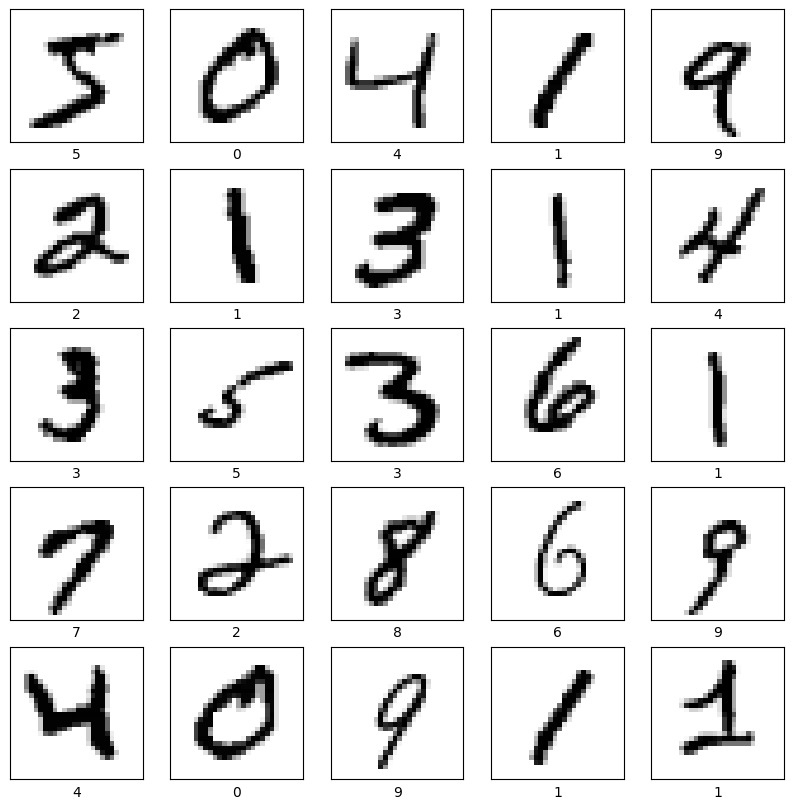

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Se configuran las capas a utilizar, a su vez se asignan otros parametros como la función de activación o las propiedades de las capas

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Se realiza el entrenamiento en 10 epocas distintas

In [43]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8748 - loss: 0.4330
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9649 - loss: 0.1177
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9782 - loss: 0.0758
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9841 - loss: 0.0536
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9867 - loss: 0.0427
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9908 - loss: 0.0315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9917 - loss: 0.0270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9937 - loss: 0.0205
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0167
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9964 - loss: 0.0132


Se puede apreciar como se tiene una mejor proximidad al 1 mientras mas avanzan las epocas, sin embargo no se haran mas epocas para evitar el sobreajuste

Seguido de esto se evalua la precisión que tuvo el entrenamiento

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9778 - loss: 0.0801

Test accuracy: 0.9778000116348267


In [45]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [46]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Se realiza la predicción

In [47]:
predictions[0]

array([6.5989787e-09, 2.1356529e-11, 5.0835560e-08, 3.1842619e-06,
       6.5562895e-15, 6.4166047e-11, 7.5610793e-16, 9.9999660e-01,
       2.7121996e-10, 8.2790145e-08], dtype=float32)

Aqui se puede ver una predicción

In [48]:
np.argmax(predictions[0])

7

Y el resultado real de esta, se observa que el resultado es el mismo por lo tanto la predicción es acertada

In [49]:
test_labels[0]

7

Para ver esto de una mejor manera se realiza una función para poder graficar las predicciones junto a su probabilidad de ser cierto número

In [50]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Primer predicción

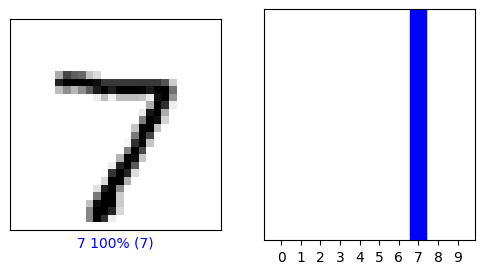

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Segunda predicción

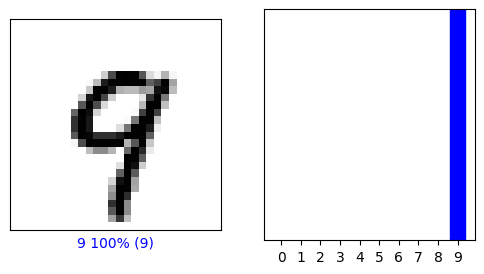

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora una predicción de 15 valoes diferentes

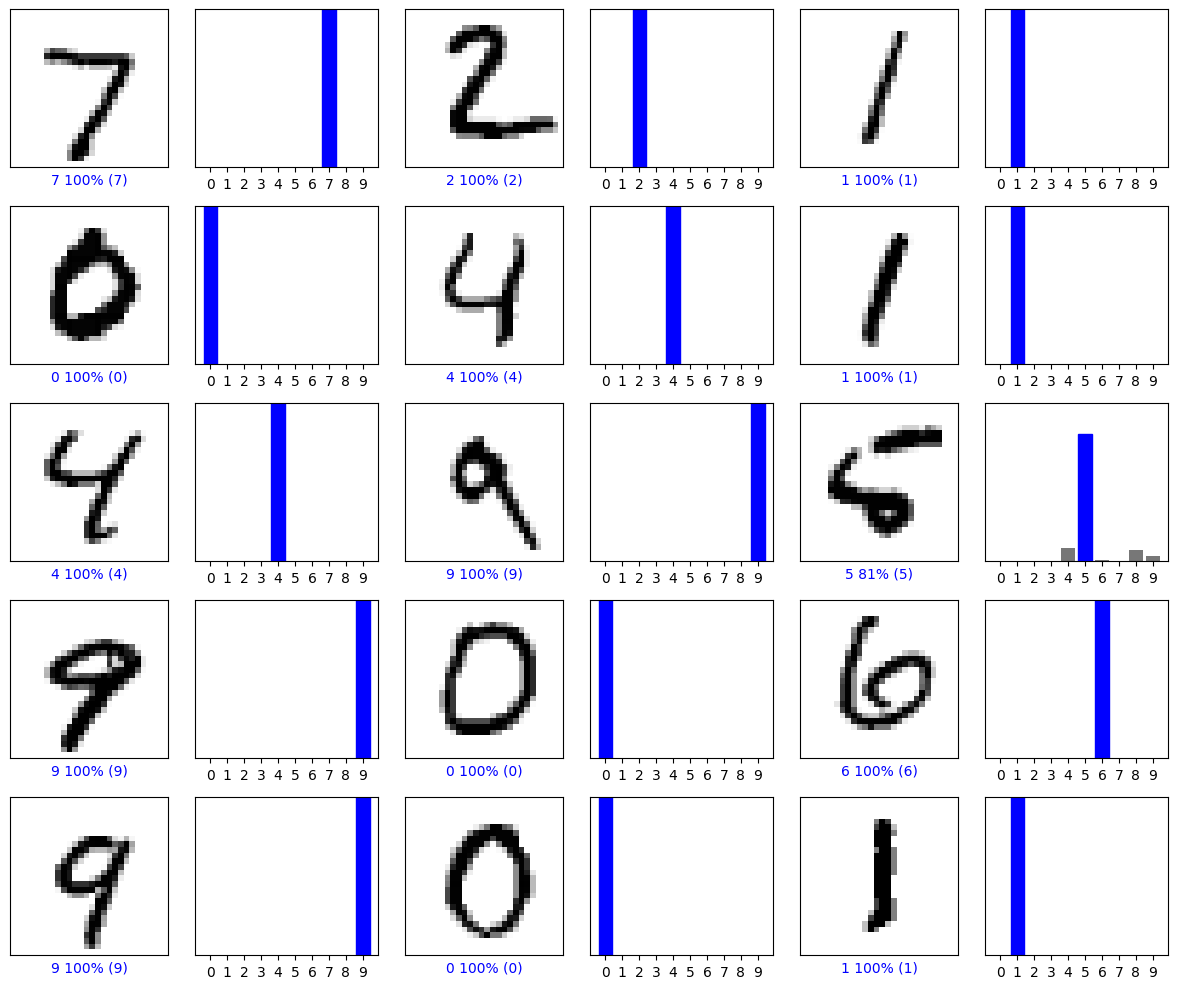

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Se observa como en cada una de ellas la predicción fue acertada, solo presentando problemas en la novena imagen aunque de igual manera acertada